In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Load data

In [256]:

# df=pd.read_csv('Human_Gait_Recogn.csv') 

Dataset for TRaining **Durting train uncomment**

In [255]:
df=pd.read_csv('HAR.csv')


Dataset for Testing **Durting train comment**

In [257]:
df.head()

,timeElapsed,x,y,z,label
0,0.0,0.141495,1.025558,0.085266,Standing
1,1.0,0.155807,1.030487,0.090134,Standing
2,2.0,0.161728,1.031693,0.098663,Standing
3,3.0,0.160599,1.019730,0.097275,Standing
4,4.0,0.162506,0.987411,0.105499,Standing


C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [258]:
df['label'].value_counts()

Walking       349176
Sitting       343256
Standing      313697
Upstairs      160082
Jogging       136415
Downstairs    134354
Name: label, dtype: int64

In [190]:
df.isnull().sum()

timeElapsed    0
x              0
y              0
z              0
label          0
dtype: int64

In [259]:
df.duplicated().sum()

0

In [260]:
df['label'].unique()

array(['Standing ', 'Sitting ', 'Jogging', 'Upstairs ', 'Walking',
       'Downstairs'], dtype=object)

## Plot Axies of Accelerometer Dataset 

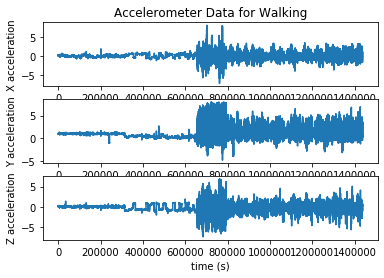

<Figure size 720x720 with 0 Axes>

In [261]:
plt.subplot(3, 1, 1)
plt.plot(df['timeElapsed'],df['x'])
plt.title('Accelerometer Data for Walking')
plt.ylabel('X acceleration')
plt.xlabel('time (s)')

plt.subplot(3, 1, 2)
plt.plot(df['timeElapsed'],df['y'])
plt.xlabel('time (s)')
plt.ylabel('Y acceleration')

plt.subplot(3, 1, 3)
plt.plot(df['timeElapsed'],df['z'])
plt.xlabel('time (s)')
plt.ylabel('Z acceleration')

plt.figure(figsize=(10,10))

plt.show();

In [262]:
X_acc= df['x'].values
Y_acc= df['y'].values
Z_acc= df['z'].values

# Preprocessing Phase


### Applying Low-Pass Filter to Acceleration Signals

In [263]:
def Filter (Data):
        a=0.02  # Cofficient of filter
        S=list(Data)  #convert acc data to list
        X=[]          #empty list to append filter data in it
        for i in range(0,len(S)):
            if i==0:
                X.append(a*S[i]) 
            else:
                X.append((1-a)*X[i-1]+a*S[i]) 
        return(X)


In [264]:
X_filtered=Filter(X_acc)
Y_filtered=Filter(Y_acc)
Z_filtered=Filter(Z_acc)

C:\Users\Yousef Khaled\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


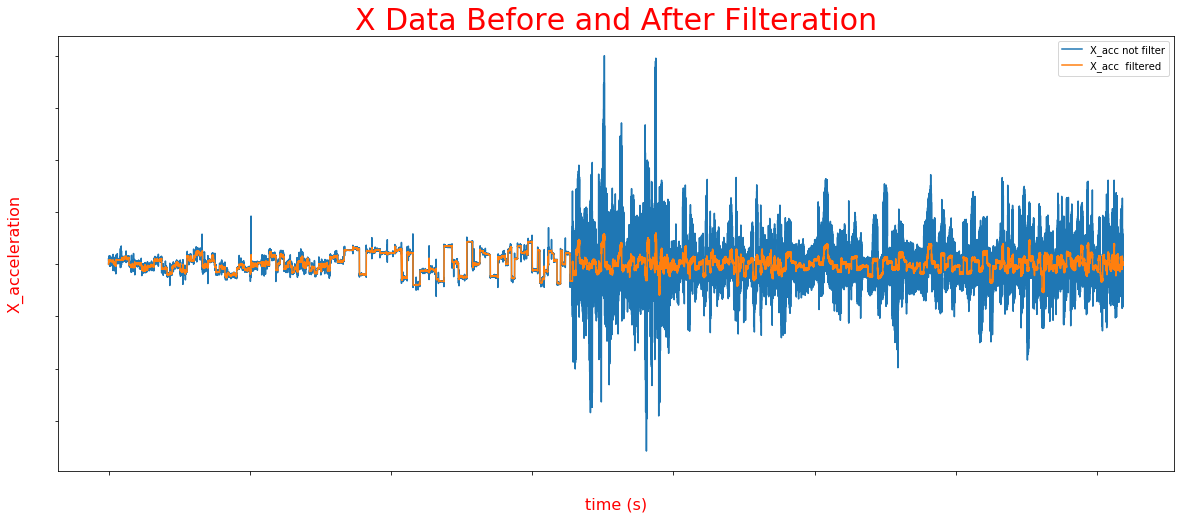

In [265]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['x'],label='X_acc not filter')
plt.plot(df['timeElapsed'],X_filtered,label='X_acc  filtered')
plt.title('X Data Before and After Filteration',color='red',fontsize=30)
plt.ylabel('X_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()


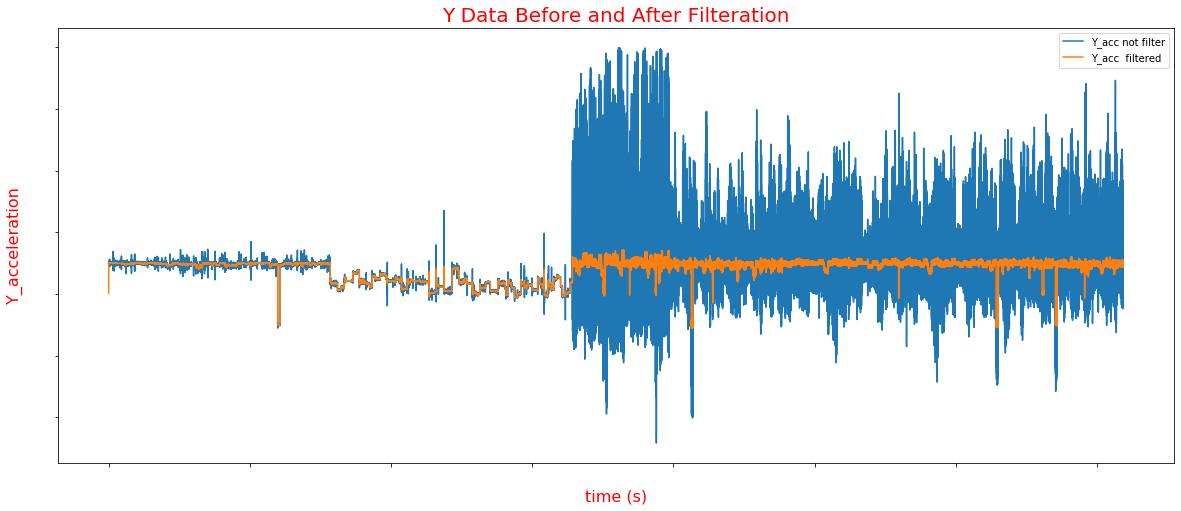

In [266]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['y'],label='Y_acc not filter')
plt.plot(df['timeElapsed'],Y_filtered,label='Y_acc  filtered')
plt.title('Y Data Before and After Filteration',color='red',fontsize=20)
plt.ylabel('Y_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

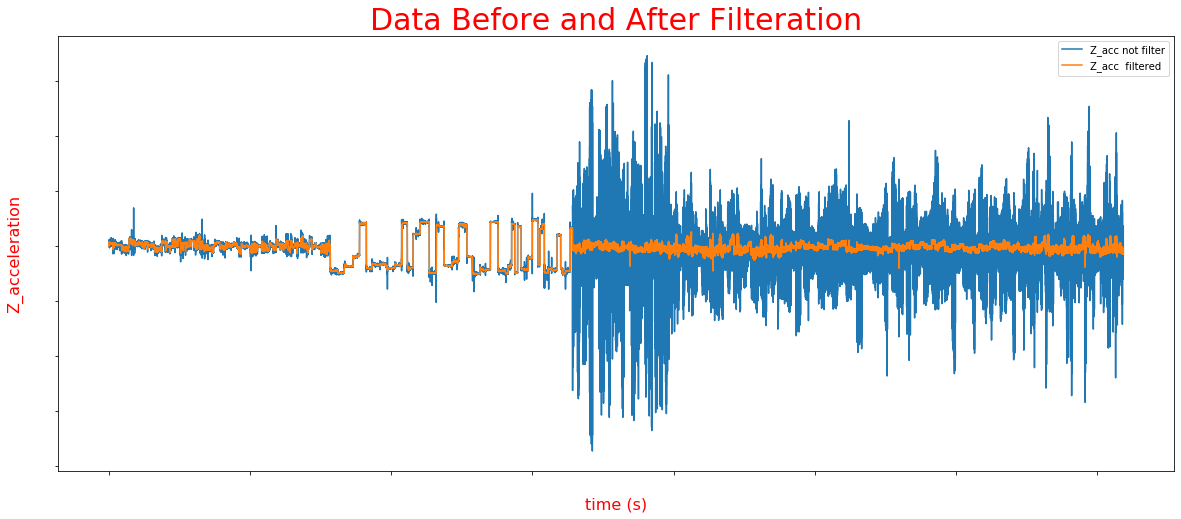

In [267]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],df['z'],label='Z_acc not filter')
plt.plot(df['timeElapsed'],Z_filtered,label='Z_acc  filtered')
plt.title('Data Before and After Filteration',color='red',fontsize=30)
plt.ylabel('Z_acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.legend()
plt.show()

### Apply smoothing to data

In [268]:
from scipy.ndimage import gaussian_filter1d
X_smoothed = gaussian_filter1d(X_filtered, 6)
Y_smoothed = gaussian_filter1d(Y_filtered, 6)
Z_smoothed = gaussian_filter1d(Z_filtered, 6)


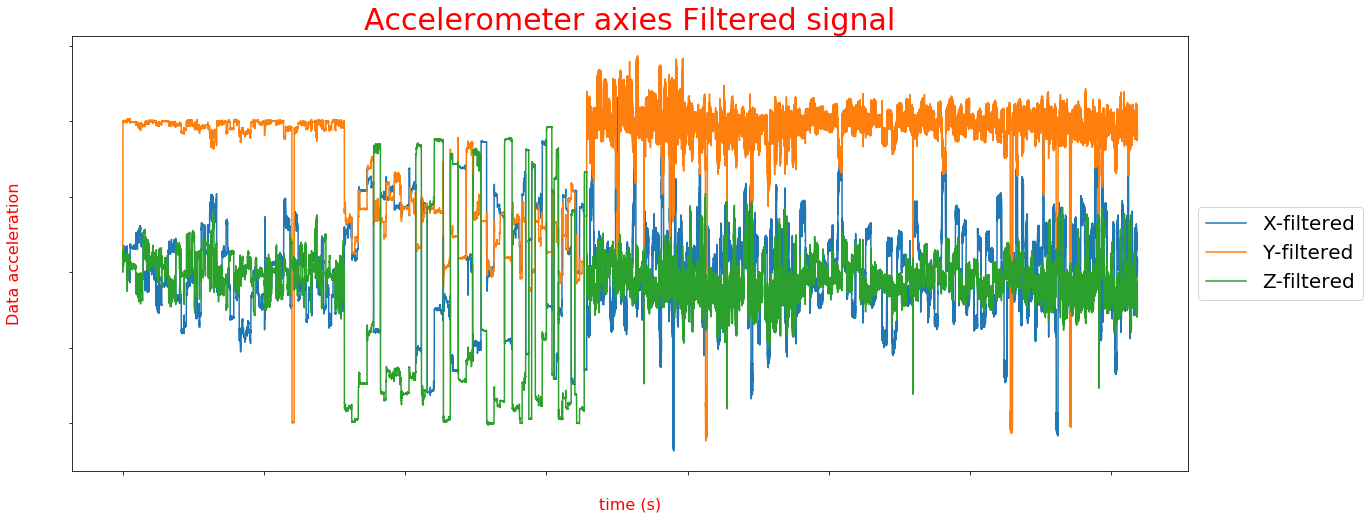

In [269]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_filtered,label='X-filtered')
plt.plot(df['timeElapsed'],Y_filtered,label='Y-filtered')
plt.plot(df['timeElapsed'],Z_filtered,label='Z-filtered')
plt.title('Accelerometer axies Filtered signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

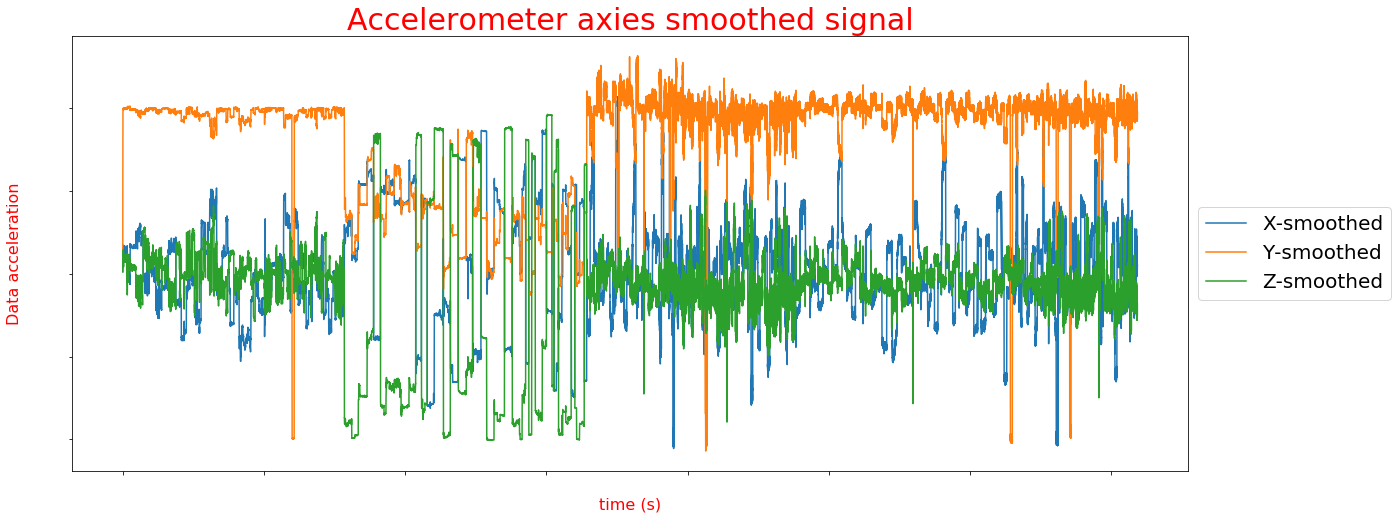

In [270]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],X_smoothed,label='X-smoothed')
plt.plot(df['timeElapsed'],Y_smoothed,label='Y-smoothed')
plt.plot(df['timeElapsed'],Z_smoothed,label='Z-smoothed')
plt.title('Accelerometer axies smoothed signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

## Applying FD,XYZ & Searching for Strides

In [271]:
X_smoothed_powered=np.power(X_smoothed,2)
Y_smoothed_powered=np.power(Y_smoothed,2)
Z_smoothed_powered=np.power(Z_smoothed,2)


In [272]:
Y_smoothed_powered

array([0.01002378, 0.01047885, 0.01140441, ..., 0.9141813 , 0.91488897,
       0.91527869])

In [273]:
X_max=np.sum(X_smoothed_powered)
Y_max=np.sum(Y_smoothed_powered)
Z_max=np.sum(Z_smoothed_powered)

if (X_max >= Y_max) and (X_max >= Z_max):
       print('x')
elif (Y_max >= X_max) and (Y_max >= Z_max):
       print('y')
else:
       print('z')

y


In [274]:
FD=Y_smoothed_powered

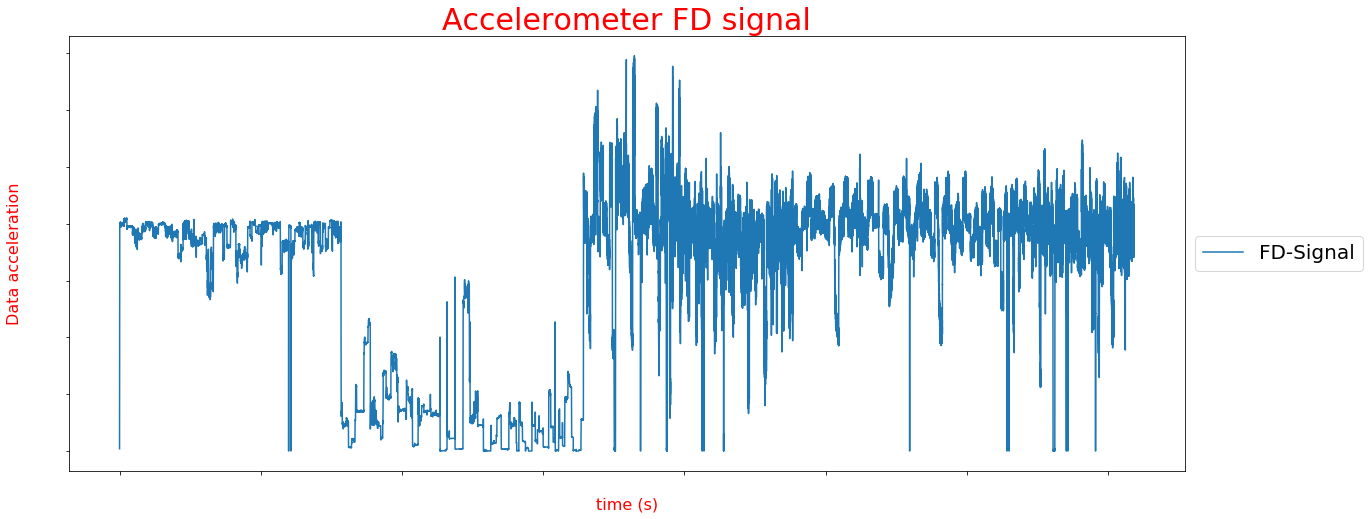

In [275]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],FD,label='FD-Signal')

plt.title('Accelerometer FD signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

In [276]:

df_XYZ=df['x']*df['x']+df['y']*df['y']+df['z']*df['z']
XYZ=df_XYZ.apply(np.sqrt)

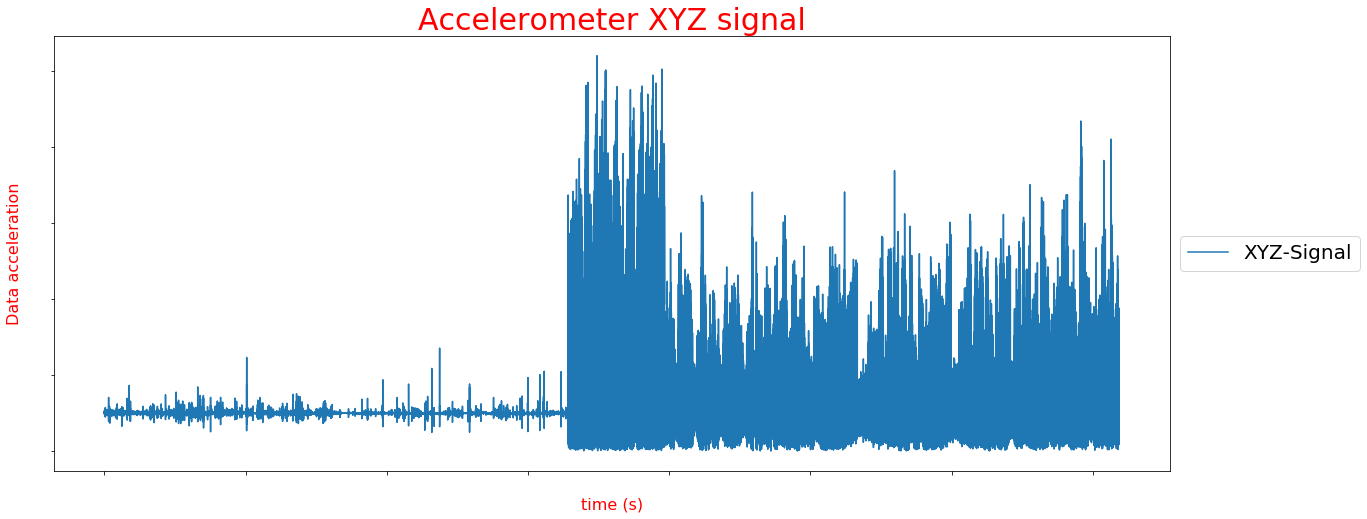

In [277]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],XYZ,label='XYZ-Signal')
plt.title('Accelerometer XYZ signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')
plt.show()

## SET Peak And Valley for signal data & Perfom Segmentation 

In [278]:
peak=FD

In [279]:
peak.shape

(1436980,)

In [280]:
inv_peak=peak*-1 

Get Inverse of peak to find Valley 


In [281]:
from scipy.signal import find_peaks
peak_x, _ = find_peaks(peak)  ##Detect Peaks
#valley, _ = find_peaks(inv_peak) ##detect valley

In [282]:
list_of_valley=list(peak_x)

In [283]:
len(list_of_valley)

37246

In [284]:
t=df['timeElapsed']

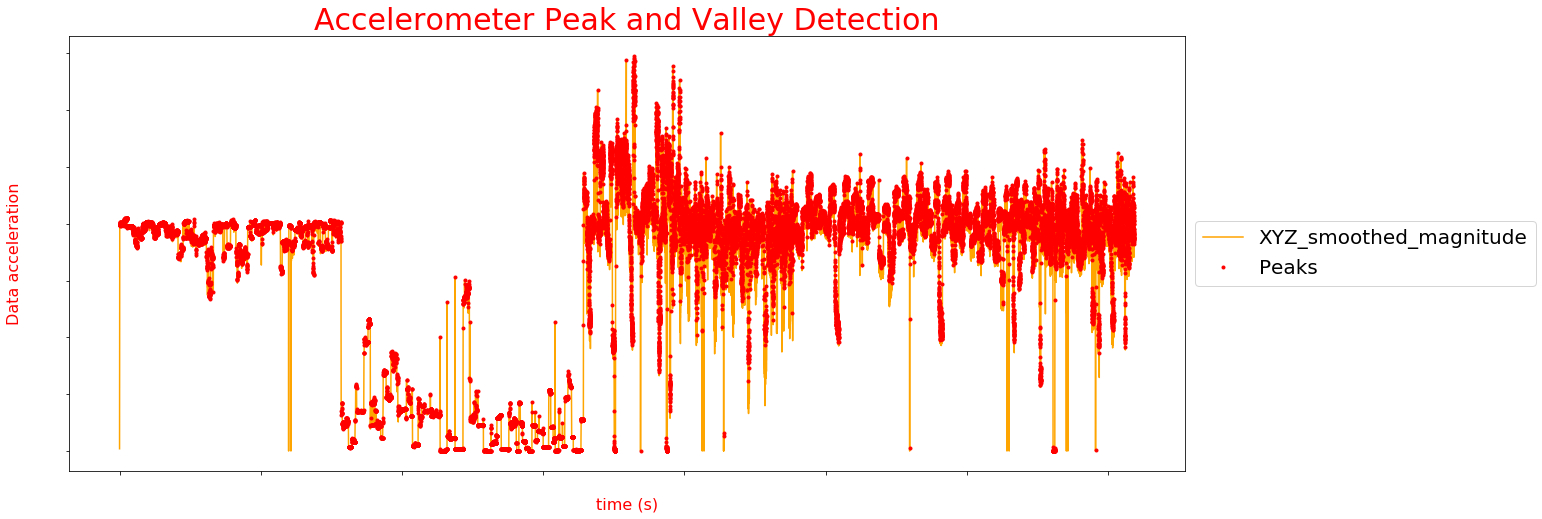

In [285]:
plt.figure(figsize=(20,8))
plt.plot(df['timeElapsed'],FD,label='XYZ_smoothed_magnitude',color='orange')
plt.plot(t[peak_x], peak[peak_x], 'r.',label='Peaks')
# plt.plot(t[valley], peak[valley], 'b.',label='valley')

plt.title('Accelerometer Peak and Valley Detection',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

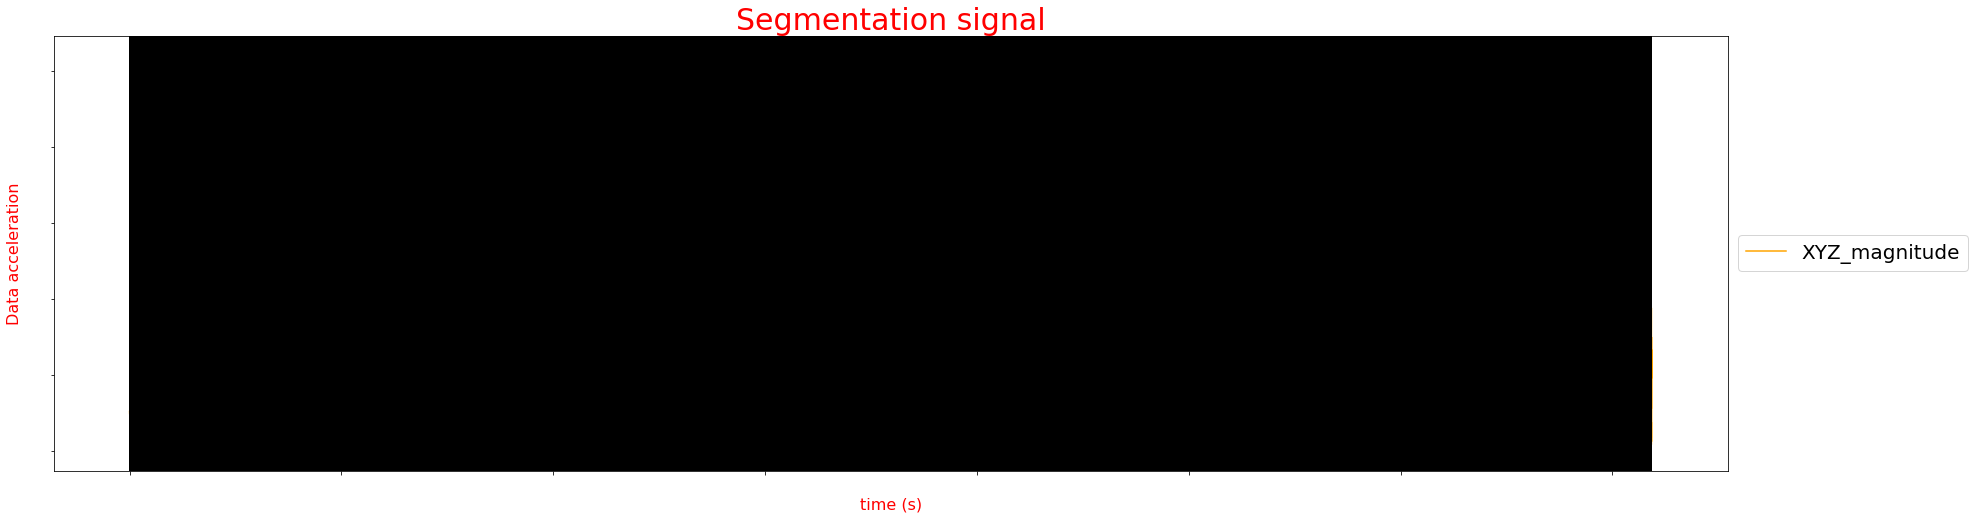

In [286]:
plt.figure(figsize=(30,8))
plt.plot(df['timeElapsed'],XYZ,label='XYZ_magnitude',color='orange')
for i in list_of_valley:
    plt.axvline(t[i],color='black')
plt.title('Segmentation signal',color='red',fontsize=30)
plt.ylabel('Data acceleration',color='red',fontsize=16)
plt.xlabel('time (s)',color='red',fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 20})
plt.xticks(fontsize=16,color='white')
plt.yticks(fontsize=16,color='white')

plt.show()

Calculate The Hight of each wave

In [287]:
hight_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        hight_xyz.append(max(XYZ[0:list_of_valley[0]])-min(XYZ[0:list_of_valley[0]]))
    else:
        hight_xyz.append(max(XYZ[list_of_valley[i-1]:list_of_valley[i]])-min(XYZ[list_of_valley[i-1]:list_of_valley[i]]))


Calculate the Mean of every wave

In [288]:
import statistics
mean_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        mean_xyz.append(statistics.mean(XYZ[0:list_of_valley[0]]))
    else:
        mean_xyz.append(statistics.mean(XYZ[list_of_valley[i-1]:list_of_valley[i]]))


Calculating the width of each wave

In [289]:
width_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        width_xyz.append(t[list_of_valley[i]]-t[0])
    else:
        width_xyz.append(t[list_of_valley[i]]-t[list_of_valley[i-1]])


Calculating The standered deviassion of each wave

In [290]:
import statistics
std_xyz = []
for i in range(0,len(list_of_valley)):
    if i ==0:
        std_xyz.append(statistics.stdev(XYZ[0:list_of_valley[0]]))
    else:
        std_xyz.append(statistics.stdev(XYZ[list_of_valley[i-1]:list_of_valley[i]]))


In [291]:
list_of_valley

[294,
 419,
 477,
 508,
 545,
 581,
 611,
 627,
 641,
 666,
 686,
 721,
 812,
 831,
 918,
 1011,
 1066,
 1123,
 1153,
 1189,
 1255,
 1301,
 1324,
 1367,
 1395,
 1437,
 1535,
 1581,
 1605,
 1654,
 1671,
 1726,
 1779,
 1813,
 1840,
 1868,
 1896,
 1932,
 1998,
 2087,
 2129,
 2151,
 2185,
 2226,
 2307,
 2355,
 2380,
 2440,
 2462,
 2487,
 2516,
 2560,
 2616,
 2640,
 2682,
 2719,
 2765,
 2814,
 2849,
 2897,
 2939,
 3002,
 3106,
 3142,
 3162,
 3233,
 3266,
 3292,
 3318,
 3355,
 3408,
 3462,
 3537,
 3554,
 3651,
 3703,
 3727,
 3761,
 3806,
 3845,
 3910,
 3937,
 4026,
 4047,
 4073,
 4156,
 4197,
 4259,
 4333,
 4387,
 4409,
 4459,
 4487,
 4511,
 4536,
 4569,
 4623,
 4704,
 4739,
 4802,
 4836,
 4865,
 4890,
 4912,
 4978,
 5013,
 5035,
 5098,
 5164,
 5263,
 5321,
 5361,
 5386,
 5429,
 5456,
 5476,
 5540,
 5558,
 5588,
 5619,
 5737,
 5801,
 5818,
 5879,
 5915,
 6038,
 6095,
 6135,
 6226,
 6262,
 6302,
 6349,
 6588,
 6682,
 6740,
 6860,
 6887,
 6945,
 7002,
 7045,
 7063,
 7090,
 7134,
 7167,
 7227,


In [292]:
df_feature=pd.DataFrame({'Acc_Mean':mean_xyz,
                        'Acc_STD':std_xyz
                        ,'peak_height':hight_xyz
                        ,'peak_width':width_xyz})

In [293]:
df_feature.shape

(37246, 4)

In [294]:
list_of_label=[]

In [295]:
counter=0
for i in  list_of_valley:
    x=df['label'].loc[i]
    list_of_label.append(x)  

    

In [296]:
df_feature['label']=list_of_label

In [297]:
df_feature['label'].value_counts()

Walking       12510
Jogging        5855
Standing       5351
Sitting        5151
Downstairs     4496
Upstairs       3883
Name: label, dtype: int64

In [298]:
df_feature.head()

,Acc_Mean,Acc_STD,peak_height,peak_width,label
0,1.012939,0.010249,0.089195,294.0,Standing
1,1.012464,0.007102,0.042663,125.0,Standing
2,1.012287,0.006789,0.039088,58.0,Standing
3,1.013333,0.014112,0.061664,31.0,Standing
4,1.009600,0.007052,0.026886,37.0,Standing


In [299]:
df_feature['label'].value_counts()

Walking       12510
Jogging        5855
Standing       5351
Sitting        5151
Downstairs     4496
Upstairs       3883
Name: label, dtype: int64

In [300]:
X=df_feature.drop(columns=['label']).values
y=df_feature['label']

In [301]:
X.shape

(37246, 4)

In [302]:
y.shape

(37246,)

# Classification Phase

> **You Can Comment and Uncomment using ( ctrl + / ) **

> **You Can found this  /   in numpad idot  :D**

### Splitting data to train and test

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=49)

During train uncomment this cell

In [54]:
print('X_train_shape ---->',X_train.shape)
print('X_test_shape ---->',X_test.shape)
print('Y_train_shape ---->',y_train.shape)
print('Y_test_shape ---->',y_test.shape)

X_train_shape ----> (7032, 4)
X_test_shape ----> (3015, 4)
Y_train_shape ----> (7032,)
Y_test_shape ----> (3015,)


During train uncomment this cell

### Preprocessimg label data and feature

In [303]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# y_labeled=le.fit_transform(y_train)
# y_labeled_test=le.transform(y_test)
y_independent=le.fit_transform(y)


In [304]:
z=le.inverse_transform(np.unique(y_labeled))


In [305]:
z

array(['Downstairs', 'Jogging', 'Sitting ', 'Standing ', 'Upstairs ',
       'Walking'], dtype=object)

During train uncomment this line and change y to y_train

In [306]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
# x_Scaler_train=sc.fit_transform(X_train)
# x_Scaler_test=sc.transform(X_test)
x_independent=sc.fit_transform(X)



During train uncomment this line and change X to X_train

### Using Support vector machine Classification

In [62]:
from sklearn.svm import SVC
classifier_SVC=SVC(kernel = 'rbf')
classifier_SVC.fit(x_Scaler_train,y_labeled)
cv_svm_train = cross_val_score(classifier_SVC , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data SVC is : ", cv_svm_train.mean())
cv_svm_test = cross_val_score(classifier_SVC , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data SVC is  : ", cv_svm_test.mean())



Cross validation for train data SVC is :  0.8236632536973834
Cross validation for test data SVC is  :  0.8076285240464345


During train uncomment this cell

Confusion matrix is :
  [[  50    9    1    0   62  118]
 [   3  709    0    0    2   70]
 [   0    0   26    0    0    0]
 [   0    1   13    0    0    0]
 [  24   13    0    0  129  173]
 [  11   18    0    0    8 1575]]


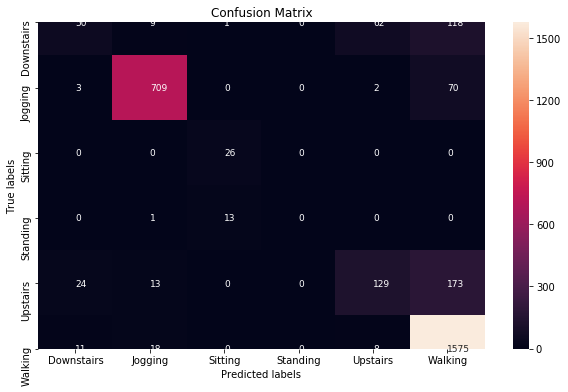

In [64]:
y_pred_SVC=classifier_SVC.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test,y_pred_SVC)
print("Confusion matrix is :\n ", cm)

annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',annot_kws=annot_kws, ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);



During train uncomment this cell

### Using KNN Classification

In [66]:
acc = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski',p=1).fit(x_Scaler_train, y_labeled)
    yhat = neigh.predict(x_Scaler_test)
    acc.append(metrics.accuracy_score(y_labeled_test, yhat))
    
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Maximum accuracy:- 0.8391376451077943 at K = 12


In [67]:
from sklearn.neighbors import KNeighborsClassifier
classifier_KNN = KNeighborsClassifier(n_neighbors = 12, metric = 'minkowski', p = 1)
classifier_KNN.fit(x_Scaler_train, y_labeled)
cv_knn_train = cross_val_score(classifier_KNN , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data KNN is : ", cv_knn_train.mean())
cv_knn_test = cross_val_score(classifier_KNN , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data KNN is : ", cv_knn_test.mean())


Cross validation for train data KNN is :  0.8387372013651877
Cross validation for test data KNN is :  0.8179104477611939


During train uncomment this cell

Confusion matrix is :
  [[  91   11    1    0   53   84]
 [   7  711    0    0    4   62]
 [   0    0   26    0    0    0]
 [   0    0   12    2    0    0]
 [  54   16    0    0  155  114]
 [  25   15    0    0   31 1541]]


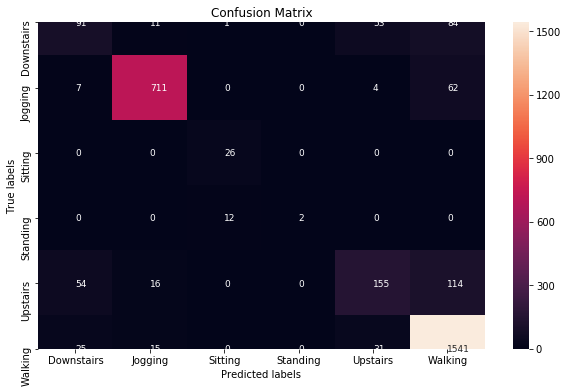

In [68]:
y_pred_Knn = classifier_KNN.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_Knn)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',annot_kws=annot_kws, ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);



During train uncomment this cell

### Using Random forest Classifier

In [70]:
acc = []
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
for i in range(1,50):
    neigh = RandomForestClassifier(n_estimators =i, criterion = 'entropy',random_state=49).fit(x_Scaler_train,y_labeled)
    yhat = neigh.predict(x_Scaler_test)
    acc.append(metrics.accuracy_score(y_labeled_test, yhat))
    
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Maximum accuracy:- 0.8490878938640133 at K = 33



>### Optimal values for random forest
|n_estimators               |criterion  |Acuuracy                                                                                   |
|:-----------------------|:-------------------------------|:------------------------------------------------------------|
|41         |gini  |   0.8185                                                                       
               |
|39             |entropy |0.82     
               |                                                        

In [71]:
from sklearn.ensemble import RandomForestClassifier
classifier_RF = RandomForestClassifier(n_estimators = 33, criterion = 'entropy',random_state=49)
classifier_RF.fit(x_Scaler_train, y_labeled)
cv_rf_train = cross_val_score(classifier_RF , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data RF is : ", cv_rf_train.mean())
cv_rf_test = cross_val_score(classifier_RF , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data RF is : ", cv_rf_test.mean())



Cross validation for train data RF is :  0.8447098976109215
Cross validation for test data RF is :  0.8301824212271973


During train uncomment this cell

Confusion matrix is :
  [[  96   10    0    1   63   70]
 [   8  722    0    0    5   49]
 [   0    0   25    1    0    0]
 [   0    0    0   14    0    0]
 [  60   12    0    0  174   93]
 [  33   18    0    0   36 1525]]


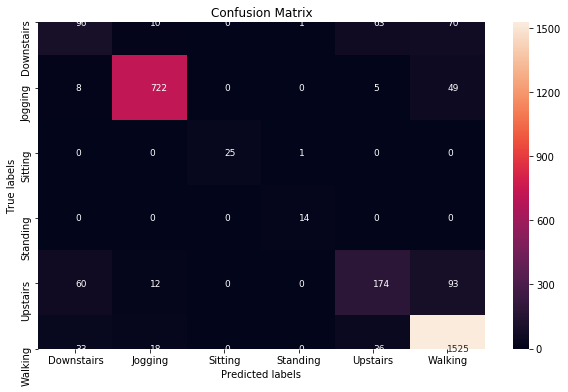

In [72]:
y_pred_RF= classifier_RF.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_RF)
print("Confusion matrix is :\n ", cm)

annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',annot_kws=annot_kws, ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Using Decision Tree Classifier

In [77]:
acc = []
from sklearn import tree
from sklearn import metrics
for i in range(1,50):
    neigh = tree.DecisionTreeClassifier(max_depth  =i, criterion = 'entropy',random_state=100).fit(x_Scaler_train,y_labeled)
    yhat = neigh.predict(x_Scaler_test)
    acc.append(metrics.accuracy_score(y_labeled_test, yhat))
    
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

Maximum accuracy:- 0.84212271973466 at K = 5


In [78]:
from sklearn import tree
classifier_DT = tree.DecisionTreeClassifier(max_depth = 5,criterion = 'entropy',random_state=49)
classifier_DT.fit(x_Scaler_train, y_labeled)
cv_dt_train = cross_val_score(classifier_DT , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data DT is : ", cv_dt_train.mean())
cv_dt_test = cross_val_score(classifier_DT , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data DT is : ", cv_dt_test.mean())


Cross validation for train data DT is :  0.8172639362912401
Cross validation for test data DT is :  0.8096185737976782


During train uncomment this cell

Confusion matrix is :
  [[ 108   10    0    1   31   90]
 [   6  713    0    0    4   61]
 [   0    0   25    1    0    0]
 [   0    0    2   12    0    0]
 [ 111   12    0    0  108  108]
 [  32   35    0    0   21 1524]]


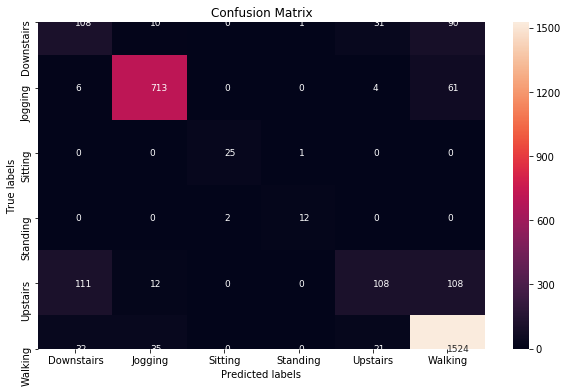

In [79]:
y_pred_DT=classifier_DT.predict(x_Scaler_test)

cm = confusion_matrix(y_labeled_test, y_pred_DT)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',annot_kws=annot_kws, ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Using Navie Bayes Classifier

In [80]:
from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(x_Scaler_train, y_labeled)
cv_nv_train = cross_val_score(classifier_NB , x_Scaler_train , y_labeled, cv = 3)
print("Cross validation for train data NB is : ", cv_nv_train)
cv_nv_test = cross_val_score(classifier_NB , x_Scaler_test , y_labeled_test, cv = 3)
print("Cross validation for test data NB is : ", cv_nv_test)


Cross validation for train data NB is :  [0.78967577 0.78412969 0.79095563]
Cross validation for test data NB is :  [0.77711443 0.77910448 0.79004975]


During train uncomment this cell

Confusion matrix is :
  [[  34   12    0    1   80  113]
 [   3  685    0    0    9   87]
 [   0    0   14   12    0    0]
 [   0    0    1   13    0    0]
 [  17   17    0    0  152  153]
 [  25   53    1    0   81 1452]]


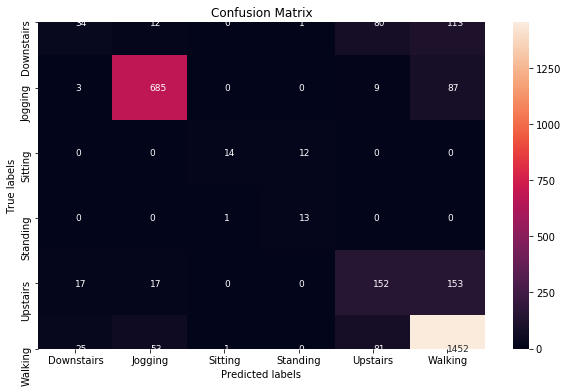

In [81]:
y_pred_NB = classifier_NB.predict(x_Scaler_test)
cm = confusion_matrix(y_labeled_test, y_pred_NB)
print("Confusion matrix is :\n ", cm)
annot_kws = {"ha": 'left',"va": 'center','size': 9}
plt.figure(figsize=(10,6))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g',annot_kws=annot_kws, ax=ax); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(z);
ax.yaxis.set_ticklabels(z);

During train uncomment this cell

### Showing Accuracy using accuracy_score

In [82]:
from sklearn.metrics import  accuracy_score

print('Accuracy of SVC          --------->',round(accuracy_score(y_labeled_test, y_pred_SVC),2))
print('Accuracy of Desicion Tree--------->',round(accuracy_score(y_labeled_test, y_pred_DT),2))
print('Accuracy of Random forest--------->',round(accuracy_score(y_labeled_test, y_pred_RF),2))
print('Accuracy of KNN          --------->',round(accuracy_score(y_labeled_test, y_pred_Knn),2))
print('Accuracy of Navie Bayes  --------->',round(accuracy_score(y_labeled_test, y_pred_NB),2))  

Accuracy of SVC          ---------> 0.83
Accuracy of Desicion Tree---------> 0.83
Accuracy of Random forest---------> 0.85
Accuracy of KNN          ---------> 0.84
Accuracy of Navie Bayes  ---------> 0.78


During train uncomment this cell

In [307]:
y_prediction_test_SVC=classifier_SVC.predict(x_independent)
y_prediction_test_KNN=classifier_KNN.predict(x_independent)
y_prediction_test_RF=classifier_RF.predict(x_independent)
y_prediction_test_DT=classifier_DT.predict(x_independent)
y_prediction_test_NB=classifier_NB.predict(x_independent)


During train **comment** this cell

In [308]:
print('Accuracy of SVC          --------->',round(accuracy_score(y_independent, y_prediction_test_SVC),2))
print('Accuracy of Desicion Tree--------->',round(accuracy_score(y_independent, y_prediction_test_KNN),2))
print('Accuracy of Random forest--------->',round(accuracy_score(y_independent, y_prediction_test_RF),2))
print('Accuracy of KNN          --------->',round(accuracy_score(y_independent, y_prediction_test_DT),2))
print('Accuracy of Navie Bayes  --------->',round(accuracy_score(y_independent, y_prediction_test_NB),2))

Accuracy of SVC          ---------> 0.39
Accuracy of Desicion Tree---------> 0.38
Accuracy of Random forest---------> 0.37
Accuracy of KNN          ---------> 0.38
Accuracy of Navie Bayes  ---------> 0.39


Confusion matrix is :
  [[   6  662    0    0    1 3827]
 [   0 5627    0    0    0  228]
 [ 969   20    0    0   12 4150]
 [ 668    4    0    0    7 4672]
 [   6  298    0    0    0 3579]
 [   3 3431    0    0    0 9076]]


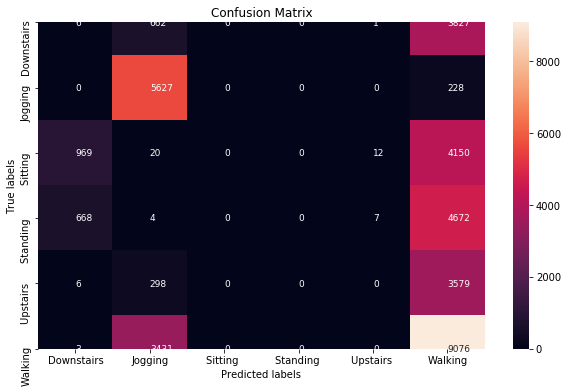

During train **comment** this cell